<a href="https://colab.research.google.com/github/joseph-c-mcguire/Privacy-Research/blob/main/K_Anonymity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Anonymity 
A data set $D$ is  $k-anonymous$, if any combination for any combination of column features that there are at least $k$ entries with that combination of features.

We'll explore this further with the following Kaggle Dataset obtained from a survey done in Isreal on fashion.

https://www.kaggle.com/datasets/thomaskonstantin/fashion-researchpersonal-and-garment-information



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('https://github.com/joseph-c-mcguire/Privacy-Research/blob/main/Personal_Fashion.xlsx?raw=true', engine = 'openpyxl')
df.tail(10)


,Sample_ID,Age,Gender,Height(cm),Weight(kg),District,Home_Town,Amount_Of_Clothes_Owned,Monthly_Income,Education,...,Garment_Material,Garment_Department,Garment_Size,Wearing_Frequency_text,Wearing_Frequency_Yearly,Garment_Wearing_Occasion,Love_Score,Comfort_Score,Outfit_Changing_Frequency,Strory_Attached_To_Garment
194,38,54,Female,156,54.0,NaN,חדרה,NaN,NaN,Master's Degree,...,Wool,נשים,M,6 פעמים בחורף,6.0,"Work, Recreation, Family Recreation",10,10,2,מחנות יד שנייה בפרדס חנה
195,46,18,Female,158,56.0,Tel Aviv District,תל אביב,NaN,NaN,high school education,...,Cotton,נשים,ONE SIZE,פעם בשבוע,52.0,"Leisure, Work, Recreation, Family Recreation",8,10,2,קיבלתי אותו מחברה טובה שלא היה לו בו צורך
196,49,19,Male,183,72.0,Tel Aviv District,רמת גן,60.0,NaN,Profession Oriented Education,...,Cotton,גברים,L,פעם בשבוע,52.0,"Leisure, Recreation, Family Recreation, Studie...",8,10,3,NaN
197,50,21,Female,154,51.0,Tel Aviv District,בת ים,NaN,6000.0,high school education,...,Other,נשים,S,3 פעמים בחודש +-,30.0,"Leisure, Work, Wedding, Recreation, Family Rec...",10,10,1,NaN
198,52,19,Male,183,72.0,Tel Aviv District,רמת גן,60.0,NaN,Profession Oriented Education,...,Cotton,גברים,L,פעם בשבוע,52.0,"Leisure, Recreation, Family Recreation, Studie...",8,10,1,NaN
199,53,18,Female,158,56.0,Tel Aviv District,תל אביב,NaN,NaN,high school education,...,Cotton,נשים,ONE SIZE,פעם בשבוע,52.0,"Leisure, Work, Recreation, Family Recreation",8,10,2,קיבלתי אותו מחברה טובה שלא היה לו בו צורך
200,54,34,Female,168,50.0,NaN,קרית טבעון,350.0,15000.0,Master's Degree,...,Nylon,נשים,S,פעמיים בשבוע,104.0,"Leisure, Work, Recreation, Official event, Stu...",8,8,2,"במשך כמה שנים עקבתי אחר המעצבת הזו (דנמרק), את..."
201,58,50,Female,163,66.0,NaN,עמק חפר,NaN,36000.0,Bachelor's Degree,...,Synthetic,נשים,M,"פעם הרבה, היום פעם בעונה",NaN,"Leisure, Work, Recreation, Family Recreation, ...",7,6,3,"קניתי בקאלה, אהבתי את סוג הבד המגניב ואת הקולי..."
202,80,34,Female,168,50.0,Tel Aviv District,רמת ישי,350.0,NaN,Master's Degree,...,Cotton,נשים,L,5 פעמים בחודש בחורף,15.0,"Leisure, Work, Family Recreation, Official eve...",7,9,1,"רכשתי עם עוד בגדים נוספים, המשלוח מדנמרק יקר, ..."
203,138,39,Male,178,72.0,Tel Aviv District,נס ציונה,NaN,8000.0,Master's Degree,...,Polyester,גברים,L,בחורף כמעט תמיד כשיורד גשם,NaN,"Leisure, Work, Wedding, Recreation, Family Rec...",9,9,1,בת הזוג שלי הזמינה לי באינטרנט


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample_ID                    204 non-null    int64  
 1   Age                          204 non-null    int64  
 2   Gender                       204 non-null    object 
 3   Height(cm)                   204 non-null    int64  
 4   Weight(kg)                   204 non-null    float64
 5   District                     166 non-null    object 
 6   Home_Town                    204 non-null    object 
 7   Amount_Of_Clothes_Owned      121 non-null    float64
 8   Monthly_Income               146 non-null    float64
 9   Education                    204 non-null    object 
 10  Garment_Type                 204 non-null    object 
 11  Garment_Description          204 non-null    object 
 12  Brand                        191 non-null    object 
 13  Year_Of_Acquiring   

Currently each row is unique

In [3]:
'Duplicates == ' + str(df.shape[0] - df.drop_duplicates().shape[0])

'Duplicates == 0'

So currently this dataset is $1-Anonymuous$ which is not anonymuous at all, each entry is unique; that is, this dataset is particularly vulnerable to data linkage attack.
This is an attack where I determine someone's identity based on quasi-personal identifiers( like 
``'Age', 'Gender', 'Height(cm)', 'Weight(kg)', 'District', 'Home_Town', 'Monthly_Income', 'Education'``.
With these QPI's we can reliably determine the identity of most, if not all, of the survey takers.
So anonymize we'll use K-Anonymization




In [27]:
def k_anonymous(data, columns):
  ## Take in a data frame, return the value of k-anonymity
  ## Aggregrate by the column names and take the non-zero minimum of each row
  ## return that number
  aggregrate = data.groupby(columns).count().apply(lambda x : set(x) - set({0}),axis = 1)
  aggregrate = aggregrate.apply(lambda x : 0 if x == set() else min(x))
  return min(aggregrate[aggregrate > 0])
print('The Data set with the above QPI\'s is ' + str(k_anonymous(df, ['Age', 'Gender', 'Height(cm)', 'Weight(kg)', 'District', 'Home_Town', 'Monthly_Income', 'Education'])) + '-Anonymous')

The Data set with the above QPI's is 1-Anonymous


The counts plots of these data types are shown below

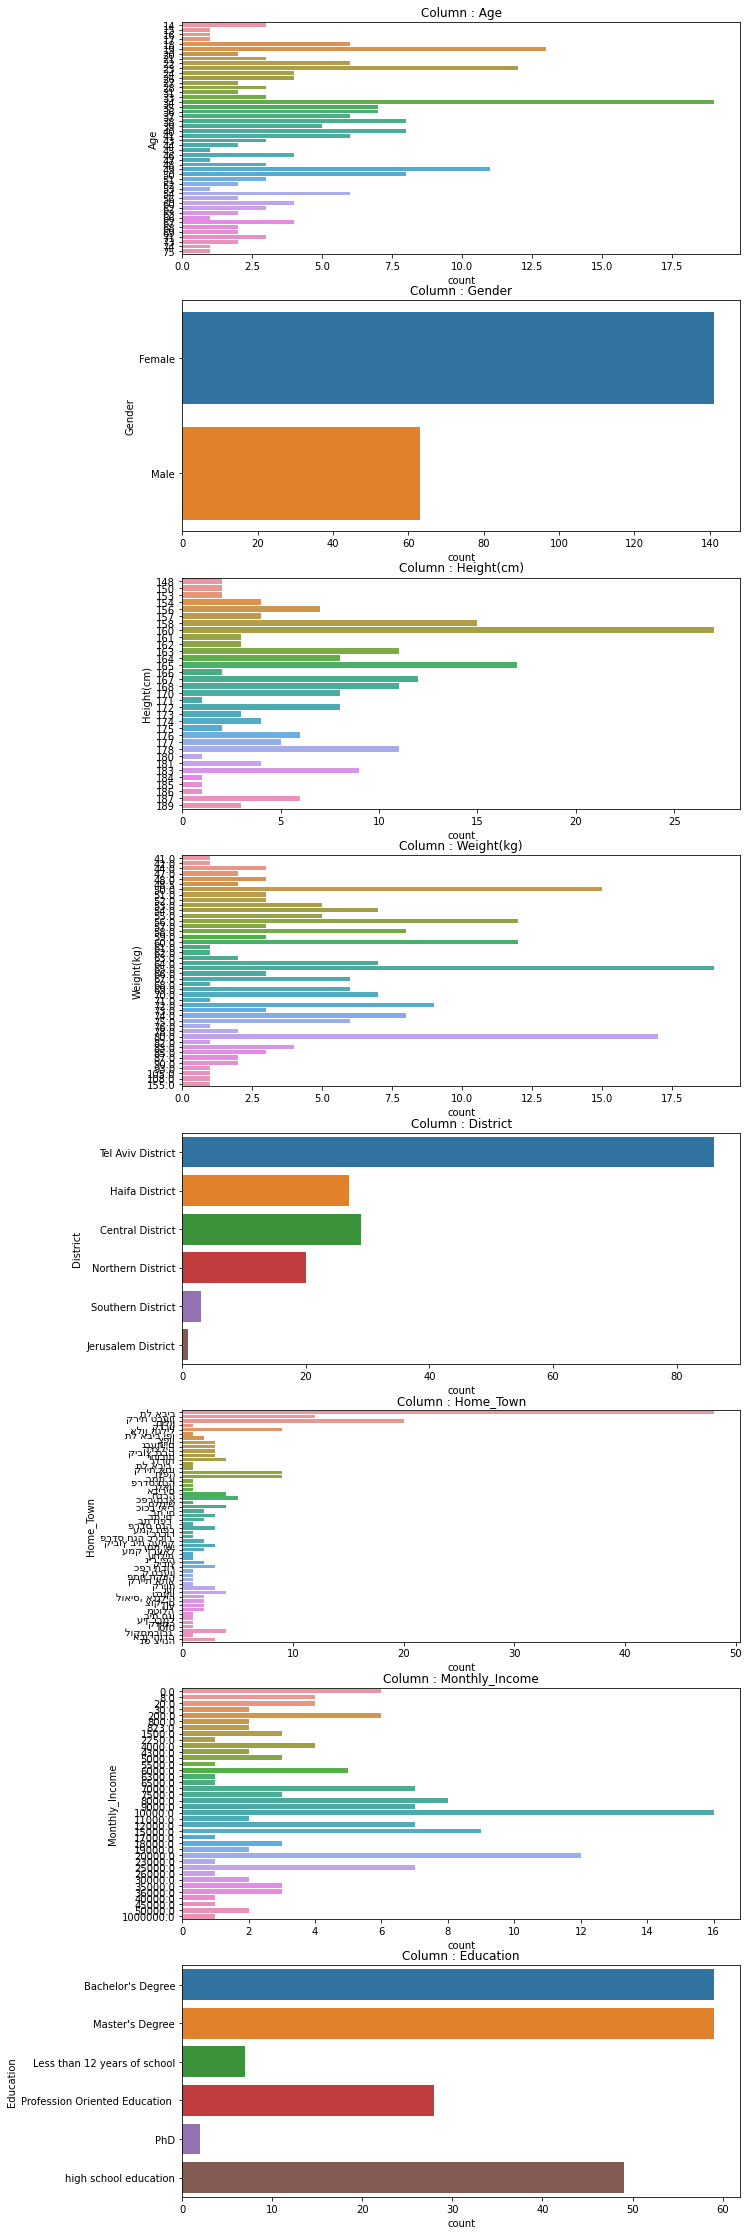

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['Age', 'Gender', 'Height(cm)', 'Weight(kg)', 'District', 
           'Home_Town', 'Monthly_Income', 'Education']

fig, ax = plt.subplots(len(columns), figsize = (10,40))
for i in range(len(columns)):
  ax[i].set_title('Column : ' + str(columns[i]))
  sns.countplot(y = columns[i], data = df, ax = ax[i])

# Manual Anonymization

Using manual anonymization rules, we can get decent results with manual straight-forward anonymization rules.

In [40]:
manual = df.loc[:,['Age', 'Gender', 'Height(cm)', 
                   'Weight(kg)', 'District', 'Home_Town',
                   'Monthly_Income', 'Education']].copy(deep = True)

manual_anon = manual.copy(deep = True)
# print('-'*20 + 'Maximums' + '-'*20)
# print(manual_anon.max())
# print('-'*20 + 'Minimums' + '-'*20)
# print(manual_anon.min())
# print('-'*20 + 'df.info()' + '-'*20)
# manual_anon.info()

manual_anon.loc[:,'Age'] = pd.cut(manual_anon.Age, range(-1,90,10))
manual_anon.loc[:,'Height(cm)'] = pd.cut(manual_anon['Height(cm)'], range(-1,190,10))
manual_anon.loc[:,'Weight(kg)'] = pd.qcut(manual_anon['Weight(kg)'], q = 4)
manual_anon.loc[:,'Monthly_Income'] = pd.qcut(manual_anon['Monthly_Income'], q = 4, precision = 1)
k_anonymous(manual_anon, ['Weight(kg)', 'Height(cm)'])


1

In [55]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import OrdinalEncoder
# clf = OrdinalEncoder(categories = ['Less than 12 years of school','high school education', 'Profession Oriented Education',"Bachelor's Degree", "Master's Degree","PhD"])
# clf.fit_transform(df[['Education']])

ValueError: ignored

For the float and int types we can use ``pd.qcut()`` which will cut up the variables based on the number of quantiles we specify.
``'Age', 'Height(cm)', 'Weight(kg)', 'Monthly_Income'``

In [33]:

# manual_anon

1